#Problem 2: Spatial Filtering 


#Problem 2.1: Average filter

#creating noisy image 

In [43]:
import cv2
import numpy

In [44]:
from google.colab.patches import cv2_imshow

In [45]:
import matplotlib.pyplot 

In [46]:
# Loading the image for making it noisy image
Original_image = cv2.imread("/content/drive/MyDrive/D22180_HW2/c2.jpg")

In [48]:
#I= image, G=Gaussian
def add_gaussian_noise(Original_image,sigma ):
    I = numpy.copy(Original_image).astype(float)
    G = numpy.random.normal(0, sigma, numpy.shape(I))
    N_I = I + G #N_I=Noisy image
    N_I = numpy.round( N_I)
    N_I[numpy.where(I<0)] = 0
    N_I[numpy.where(I>255)] = 255
    N_I = numpy.uint8( N_I)
    return  N_I

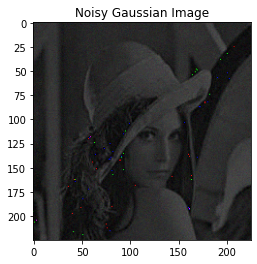

In [49]:
G_N_img = add_gaussian_noise(Original_image, 5)
matplotlib.pyplot.imshow(G_N_img, cmap='gray')
matplotlib.pyplot.title('Noisy Gaussian Image')
matplotlib.pyplot.show()

#Problem 2.1: Average Filtering

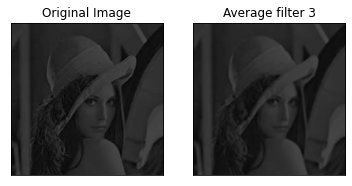

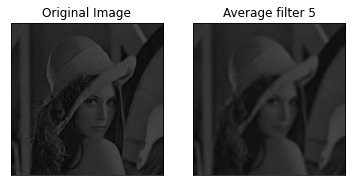

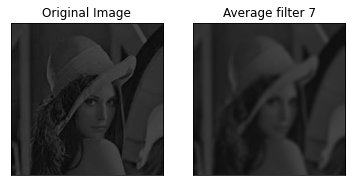

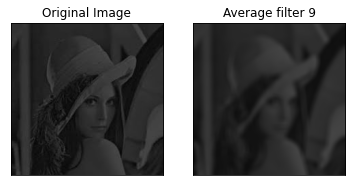

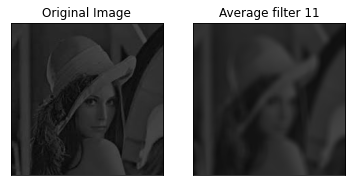

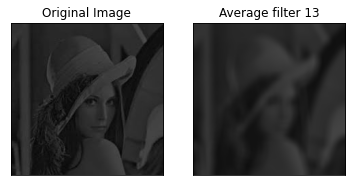

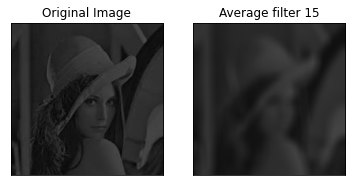

In [50]:
#s=size
s = [3, 5,7,9,11,13,15]
for j in range(7):
    A_Filtter = cv2.blur(Original_image,(s[j],s[j]))

    matplotlib.pyplot.subplot(121),matplotlib.pyplot.imshow(Original_image),matplotlib.pyplot.title('Original Image')
    matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
    matplotlib.pyplot.subplot(122),matplotlib.pyplot.imshow(A_Filtter),matplotlib.pyplot.title('Average filter image')
    matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
    matplotlib.pyplot.title("Average filter "+str(s[j]))
    matplotlib.pyplot.show()


Here, sizes of windows are 3×3, 5×5, 7×7,9×9,11x11,13x13,15x15 to remove a high-level noise.

And an appropriate window size for this noise level is 3x3.


#Problem 2.2: Gaussian filter

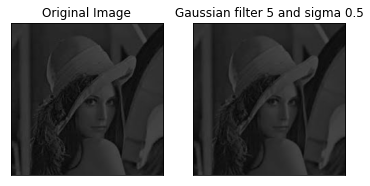

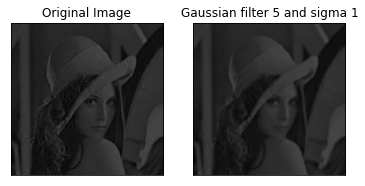

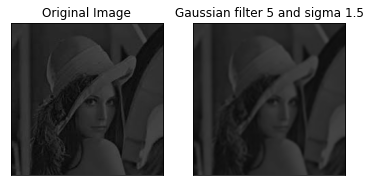

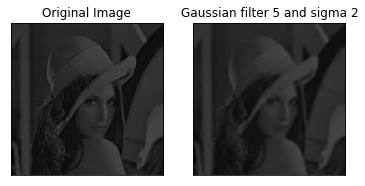

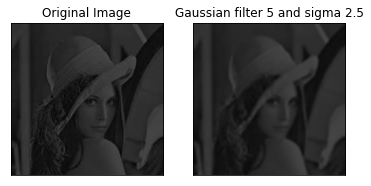

In [51]:
s = [5]
sigma = [.5, 1,1.5,2,2.5,3,3.5,4,4.5,5]
for j in range(5):
    for k in range(1):
        G_image = cv2.GaussianBlur(Original_image,(s[k],s[k]),sigma[j])
        matplotlib.pyplot .subplot(121),matplotlib.pyplot .imshow(Original_image),matplotlib.pyplot .title('Original Image')
        matplotlib.pyplot .xticks([]), matplotlib.pyplot .yticks([])
        matplotlib.pyplot .subplot(122),matplotlib.pyplot .imshow(G_image),matplotlib.pyplot .title('Gaussian Filte based image')
        matplotlib.pyplot .xticks([]), matplotlib.pyplot .yticks([])
        matplotlib.pyplot .title("Gaussian filter "+str(s[k])+" and sigma "+str(sigma[j]))
        matplotlib.pyplot .show()

#Problem 2.3: Median filter

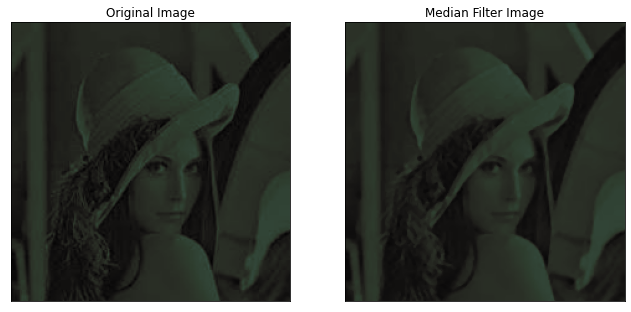

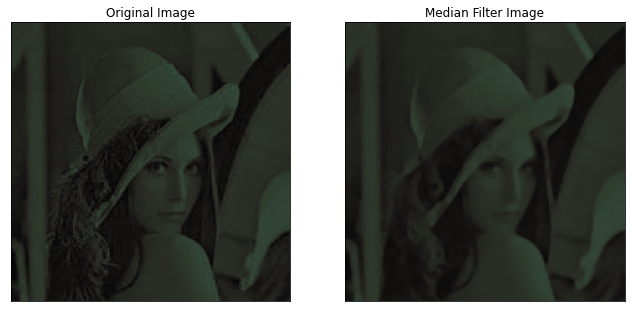

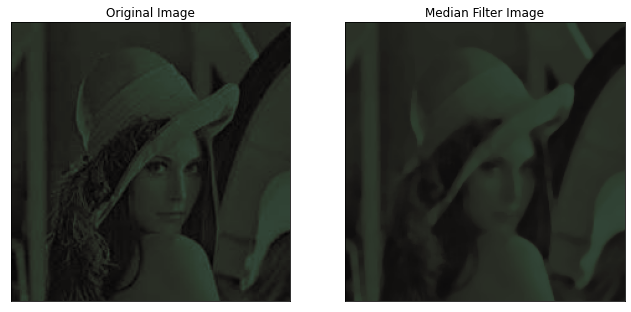

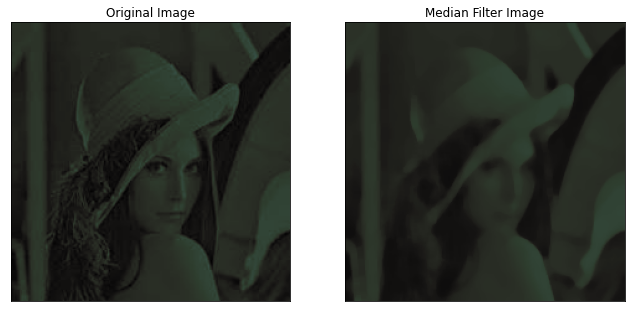

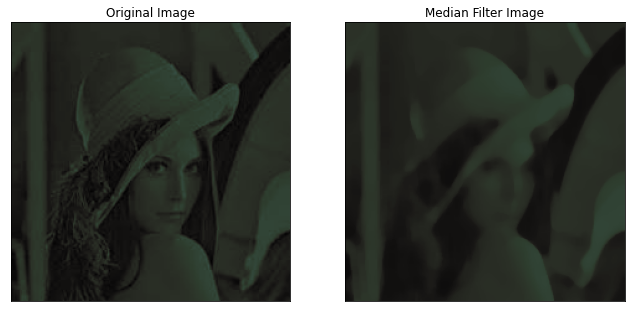

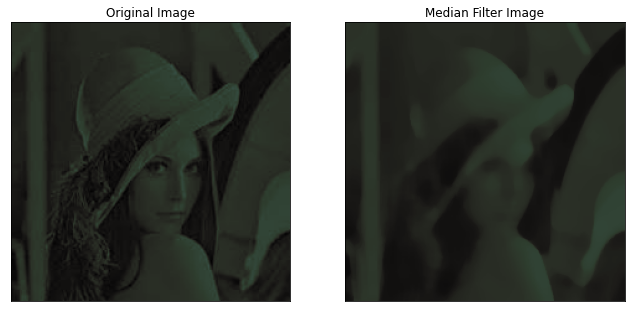

In [52]:
s = [3, 5,7,9,11,13,15]
for j in range(7):
    M_image = cv2.medianBlur(Original_image, s[j])
    matplotlib.pyplot.figure(figsize=(11,6))
    matplotlib.pyplot.subplot(121), matplotlib.pyplot.imshow(cv2.cvtColor(Original_image, cv2.COLOR_HSV2RGB)),matplotlib.pyplot.title('Original Image')
    matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
    matplotlib.pyplot.subplot(122), matplotlib.pyplot.imshow(cv2.cvtColor(M_image, cv2.COLOR_HSV2RGB)),matplotlib.pyplot.title('Median Filter Image')
    matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
    matplotlib.pyplot.show()

The traditional median filter removes low-level noise from the image, but it is not good at high-level noise. Here, sizes of windows are 3×3, 5×5, 7×7,9×9,11x11,13x13,15x15 to remove a high-level noise.And an appropriate window size for this noise level is 3x3.
There is always a trade off between removing noise and preserving the edges of an image. In order to remove the speckle noise in an image a blurring filter needs to be applied which in turn blurs the edges of the image. If you want to retain the edges of an image the only noise that you can remove is the salt and pepper noise.

#Problem 2.4: Edge Detection (Sobel and Prewitt Operators) &
#Provlem  2.5: Gradient magnitude  estimation

In [53]:
from google.colab.patches import cv2_imshow

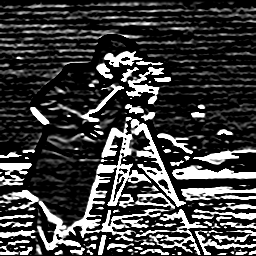

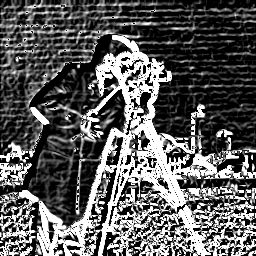

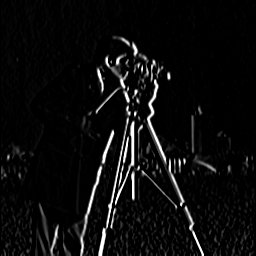

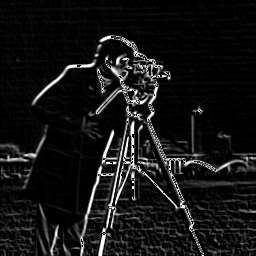

In [54]:
#original image
O_I = cv2.imread('/content/drive/MyDrive/D22180_HW2/cameraman.png')
#gray scaled image of original image
G_I = cv2.imread('/content/drive/MyDrive/D22180_HW2/cameraman.png', cv2.IMREAD_GRAYSCALE)

I_Gu = cv2.GaussianBlur(G_I, (3, 3), 0)#Gausssian Image =I_G


#canny
I_C= cv2.Canny(O_I, 150,250) #image_canny

#sobel
I_Sx = cv2.Sobel(I_Gu, cv2.CV_8U, 1, 0, ksize=5) # I_S= Sobel image
I_Sy = cv2.Sobel(I_Gu, cv2.CV_8U, 0, 1, ksize=5)
I_S = I_Sx + I_Sy


#prewitt
kernelx = numpy.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = numpy.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
I_Px = cv2.filter2D(I_Gu, -1, kernelx) #image_prewitt= I_P
I_Py = cv2.filter2D(I_Gu, -1, kernely)


cv2_imshow(O_I) 
cv2_imshow(I_C)
cv2_imshow(I_Sx)
cv2_imshow(I_Sy)
cv2_imshow(I_S)
cv2_imshow(I_Px)
cv2_imshow(I_Py)
cv2_imshow(I_Px + I_Py)

#Problem 2.6: Laplacian edge detector

In [ ]:
O_I = cv2.imread('/content/drive/MyDrive/D22180_HW2/cameraman.png')

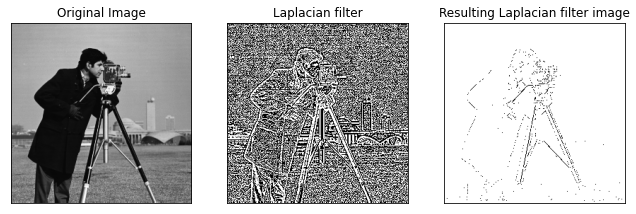

In [ ]:
L_I = cv2.Laplacian(O_I,cv2.CV_64F)
matplotlib.pyplot.figure(figsize=(11,6))
matplotlib.pyplot.subplot(131), matplotlib.pyplot.imshow(O_I, cmap='gray'),matplotlib.pyplot.title('Original Image')
matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
matplotlib.pyplot.subplot(132), matplotlib.pyplot.imshow(L_I, cmap='gray'),matplotlib.pyplot.title('Laplacian filter')
matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
matplotlib.pyplot.subplot(133), matplotlib.pyplot.imshow(O_I + L_I, cmap='gray'),matplotlib.pyplot.title('Resulting Laplacian filter image')
matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
matplotlib.pyplot.show()

#Problem 2.6, 2.7 and 2.8: Edge map E using zero crossing detector, Laplacian edge Detection LOG 
 

In [ ]:
import math

In [ ]:
def LOG(x, y, sigma):
    N = ( (y**2)+(x**2)-2*(sigma**2) )
    D= ( (2*math.pi*(sigma**6) ))
    E = math.exp( -((x**2)+(y**2))/(2*(sigma**2)) )
    return N*E/D

In [ ]:
def fn_log(sigma, s = 5):
    A = math.ceil(float(s)*float(sigma))

    if(A%2 == 0):
        A = A + 1

    LOGmask = []

    A_R= int(math.floor(A/2))
    print("Starting from " + str(-A_R) + " to " + str(A_R))
    for j in range(-A_R, A_R):
        for k in range(-A_R, A_R):
            LOGmask.append(LOG(j,k,sigma))
    LOGmask = numpy.array(LOGmask)
    LOGmask = LOGmask.reshape(A,A)
    return LOGmask

In [ ]:
def conv(O_I, mask):
    w = O_I.shape[1]
    h = O_I.shape[0]
    A_R = int(math.floor(mask.shape[0]/2))

    R_I = numpy.zeros((h, w))

    # Iterate over every pixel that can be covered by the mask
    for l in range(A_R,w-A_R):
        for m in range(A_R,h-A_R):
            # Then convolute with the mask 
            for n in range(-A_R,A_R):
                for o in range(-A_R,A_R):
                    R_I[m,l] += mask[A_R+o,A_R+n]*O_I[j+o,l+n]
    return R_I


    # Check the sign (negative or positive) of all the pixels around each pixel

     # If all the signs around the pixel are the same and they're not all zero, then it's not a zero crossing and not an edge. 
            # Otherwise, copy it to the edge map.

In [ ]:
def zero_cross_Test(LOG_I):
    zero_Cross_I = numpy.zeros(LOG_I.shape)

    for l in range(1,LOG_I.shape[0]-1):
        for m in range(1,LOG_I.shape[1]-1):
           N_C = 0
           P_C = 0
           for i in range(-1, 1):
                for j in range(-1,1):
                    if(i != 0 and j != 0):
                        if(LOG_I[l+i,m+j] < 0):
                            N_C += 1
                        elif(LOG_I[l+i,m+j] > 0):
                            P_C += 1
           Zero_C = ( (N_C > 0) and (P_C > 0) )
           if(Zero_C):
                zero_Cross_I[i,j] = 1

    return zero_Cross_I

In [ ]:
def R_LOG(bin_image, sigma_val, size_val):
    print("Create the LOG maskk")
    LOG = fn_log(sigma_val, size_val)
    print("Smooth the image by convolving with the LoG mask")
    LOG_I = conv(bin_image, LOGmask)

    print('Display the smoothed imgage')
    blurred = fig.add_subplot(1,4,2)
    blurred.imshow(LOG_I, cmap='gray')

    print("Find the zero crossings")
    zero_Cross_I = zero_cross_Test(LOG_I)
    print(zero_Cross_I)

    Edg = fig.add_subplot(1,4,3)
    Edg.imshow(zero_Cross_I, cmap='gray')
    pylab.show()

In [ ]:
src_I = cv2.imread('/content/drive/MyDrive/D22180_HW2/cameraman.png', cv2.IMREAD_COLOR)

In [ ]:
src_I = cv2.GaussianBlur(src_I, (3, 3), 0)

In [ ]:
Src_I_G = cv2.cvtColor(src_I, cv2.COLOR_BGR2GRAY)

In [ ]:
D = cv2.Laplacian(Src_I_G, cv2.CV_16S, ksize=3)
ABS_D = cv2.convertScaleAbs(D)

In [ ]:
matplotlib.pyplot.imshow(ABS_D, cmap="gray")